In [1]:
import numpy as np
import pandas as pd



In [2]:
file_path = "Bird_Monitoring_Data_GRASSLAND.XLSX"
excel_data = pd.ExcelFile(file_path)
sheet_names = excel_data.sheet_names
sheets_dict = {sheet: excel_data.parse(sheet) for sheet in sheet_names}

In [3]:
combined_grassland_df = pd.concat(
    [df.assign(Sheet=sheet_name) for sheet_name, df in sheets_dict.items()],
    ignore_index=True
)

C:\Users\Asus\AppData\Local\Temp\ipykernel_5384\2330054452.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_grassland_df = pd.concat(


In [4]:
combined_grassland_df = combined_grassland_df.drop(columns=['Sheet'])

In [5]:
combined_grassland_df.head()

,Admin_Unit_Code,Sub_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt
0,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,CHSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
1,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False
2,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,GRSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
3,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
4,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,FISP,False,True,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True


In [7]:
combined_grassland_df.isna().sum()

Admin_Unit_Code                   0
Sub_Unit_Code                  8531
Plot_Name                         0
Location_Type                     0
Year                              0
Date                              0
Start_Time                        0
End_Time                          0
Observer                          0
Visit                             0
Interval_Length                   0
ID_Method                         1
Distance                       1394
Flyover_Observed                  0
Sex                               0
Common_Name                       0
Scientific_Name                   0
AcceptedTSN                      24
TaxonCode                         2
AOU_Code                          0
PIF_Watchlist_Status              0
Regional_Stewardship_Status       0
Temperature                       0
Humidity                          0
Sky                               0
Wind                              0
Disturbance                       0
Previously_Obs              

In [8]:
combined_grassland_df.drop(columns=['Sub_Unit_Code'], inplace=True)

In [9]:
mode_value = combined_grassland_df['Distance'].mode()[0]
combined_grassland_df['Distance'].fillna(mode_value, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_5384\2403562125.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_grassland_df['Distance'].fillna(mode_value, inplace=True)


In [10]:
combined_grassland_df[combined_grassland_df['TaxonCode'].isna()]

,Admin_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,...,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt
2596,ANTI,ANTI-0075,Grassland,2018,2018-07-13,07:46:00,07:56:00,Kimberly Serno,3,0-2.5 min,...,NOCR,False,False,23.9,72.300003,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,No effect on count,False,True
5556,MONO,MONO-0096,Grassland,2018,2018-05-10,06:18:00,06:29:00,Brian Swimelar,1,0-2.5 min,...,CHPH,False,False,19.0,63.000000,Partly Cloudy,Calm (< 1 mph) smoke rises vertically,Moderate effect on count,False,True


In [11]:
pd.set_option('display.max_columns',None)

In [12]:
combined_grassland_df[combined_grassland_df["AOU_Code"]=='NOCR']

,Admin_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Sex,Common_Name,Scientific_Name,AcceptedTSN,TaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt
2596,ANTI,ANTI-0075,Grassland,2018,2018-07-13,07:46:00,07:56:00,Kimberly Serno,3,0-2.5 min,Singing,50 - 100 Meters,False,Undetermined,Northwestern Crow,Corvus caurinus,179736.0,NaN,NOCR,False,False,23.9,72.300003,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,No effect on count,False,True


In [13]:
combined_grassland_df[combined_grassland_df["AOU_Code"]=='CHPH']

,Admin_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Sex,Common_Name,Scientific_Name,AcceptedTSN,TaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt
5556,MONO,MONO-0096,Grassland,2018,2018-05-10,06:18:00,06:29:00,Brian Swimelar,1,0-2.5 min,Singing,50 - 100 Meters,False,Male,Chinese Pond-Heron,Ardeola bacchus,174861.0,NaN,CHPH,False,False,19.0,63.0,Partly Cloudy,Calm (< 1 mph) smoke rises vertically,Moderate effect on count,False,True


In [14]:
combined_grassland_df["TaxonCode"].fillna('0',inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_5384\603153026.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_grassland_df["TaxonCode"].fillna('0',inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_5384\603153026.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  combined_grassland_df["TaxonCode"].fillna('0',inplace=True)


In [15]:
combined_grassland_df.isna().sum()

Admin_Unit_Code                 0
Plot_Name                       0
Location_Type                   0
Year                            0
Date                            0
Start_Time                      0
End_Time                        0
Observer                        0
Visit                           0
Interval_Length                 0
ID_Method                       1
Distance                        0
Flyover_Observed                0
Sex                             0
Common_Name                     0
Scientific_Name                 0
AcceptedTSN                    24
TaxonCode                       0
AOU_Code                        0
PIF_Watchlist_Status            0
Regional_Stewardship_Status     0
Temperature                     0
Humidity                        0
Sky                             0
Wind                            0
Disturbance                     0
Previously_Obs                  0
Initial_Three_Min_Cnt           0
dtype: int64

In [16]:
combined_grassland_df["ID_Method"].fillna("Calling",inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_5384\740424238.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_grassland_df["ID_Method"].fillna("Calling",inplace=True)


In [17]:
combined_grassland_df["AcceptedTSN"].fillna(0,inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_5384\2205005156.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_grassland_df["AcceptedTSN"].fillna(0,inplace=True)


In [18]:
combined_grassland_df.dtypes

Admin_Unit_Code                        object
Plot_Name                              object
Location_Type                          object
Year                                   object
Date                           datetime64[ns]
Start_Time                             object
End_Time                               object
Observer                               object
Visit                                  object
Interval_Length                        object
ID_Method                              object
Distance                               object
Flyover_Observed                       object
Sex                                    object
Common_Name                            object
Scientific_Name                        object
AcceptedTSN                           float64
TaxonCode                              object
AOU_Code                               object
PIF_Watchlist_Status                   object
Regional_Stewardship_Status            object
Temperature                       

In [19]:
combined_grassland_df["Temperature"]=combined_grassland_df["Temperature"].round(0).astype(int)
combined_grassland_df["Humidity"]=combined_grassland_df["Humidity"].round(0).astype(int)

In [20]:
combined_grassland_df.head()

,Admin_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Sex,Common_Name,Scientific_Name,AcceptedTSN,TaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt
0,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,Singing,50 - 100 Meters,False,Male,Chipping Sparrow,Spizella passerina,179435.0,84781.0,CHSP,False,False,20,79,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
1,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,7.5 - 10 min,Singing,50 - 100 Meters,False,Undetermined,Eastern Bluebird,Sialia sialis,179801.0,87184.0,EABL,False,False,20,79,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False
2,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,Singing,<= 50 Meters,False,Male,Grasshopper Sparrow,Ammodramus savannarum,179333.0,83867.0,GRSP,False,False,20,79,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
3,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,Singing,50 - 100 Meters,False,Undetermined,Eastern Bluebird,Sialia sialis,179801.0,87184.0,EABL,False,False,20,79,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
4,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,Singing,50 - 100 Meters,False,Male,Field Sparrow,Spizella pusilla,179443.0,84790.0,FISP,False,True,20,79,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True


In [21]:
combined_grassland_df['Day'] = combined_grassland_df['Date'].dt.day
combined_grassland_df['Month'] = combined_grassland_df['Date'].dt.month

In [22]:
combined_grassland_df.head()

,Admin_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Sex,Common_Name,Scientific_Name,AcceptedTSN,TaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt,Day,Month
0,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,Singing,50 - 100 Meters,False,Male,Chipping Sparrow,Spizella passerina,179435.0,84781.0,CHSP,False,False,20,79,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,22,5
1,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,7.5 - 10 min,Singing,50 - 100 Meters,False,Undetermined,Eastern Bluebird,Sialia sialis,179801.0,87184.0,EABL,False,False,20,79,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False,22,5
2,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,Singing,<= 50 Meters,False,Male,Grasshopper Sparrow,Ammodramus savannarum,179333.0,83867.0,GRSP,False,False,20,79,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,22,5
3,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,Singing,50 - 100 Meters,False,Undetermined,Eastern Bluebird,Sialia sialis,179801.0,87184.0,EABL,False,False,20,79,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,22,5
4,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,Singing,50 - 100 Meters,False,Male,Field Sparrow,Spizella pusilla,179443.0,84790.0,FISP,False,True,20,79,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,22,5


In [24]:
combined_grassland_df.to_csv("Cleaned_grassland_birds.csv",index = False)

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Asus\AppData\Local\Temp\ipykernel_5384\1508562911.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Observer",data=combined_grassland_df,palette='viridis')


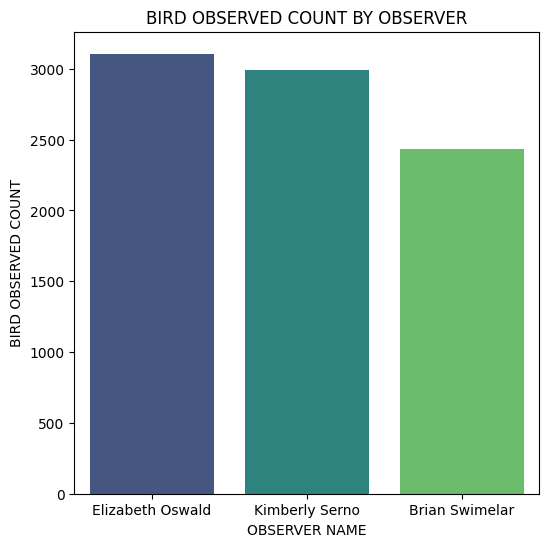

In [26]:
plt.figure(figsize=(6,6))
sns.countplot(x="Observer",data=combined_grassland_df,palette='viridis') 
plt.title("BIRD OBSERVED COUNT BY OBSERVER")
plt.xlabel("OBSERVER NAME")
plt.ylabel("BIRD OBSERVED COUNT")
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_5384\131859758.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="ID_Method",data=combined_grassland_df,palette='viridis')


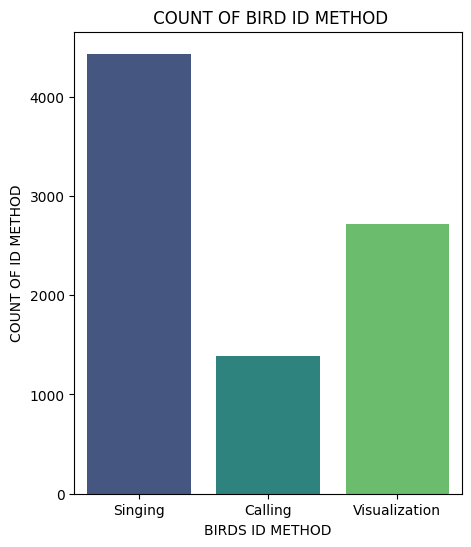

In [27]:
plt.figure(figsize=(5, 6))
sns.countplot(x="ID_Method",data=combined_grassland_df,palette='viridis') 
plt.title(" COUNT OF BIRD ID METHOD")
plt.xlabel("BIRDS ID METHOD")
plt.ylabel("COUNT OF ID METHOD")
plt.show()

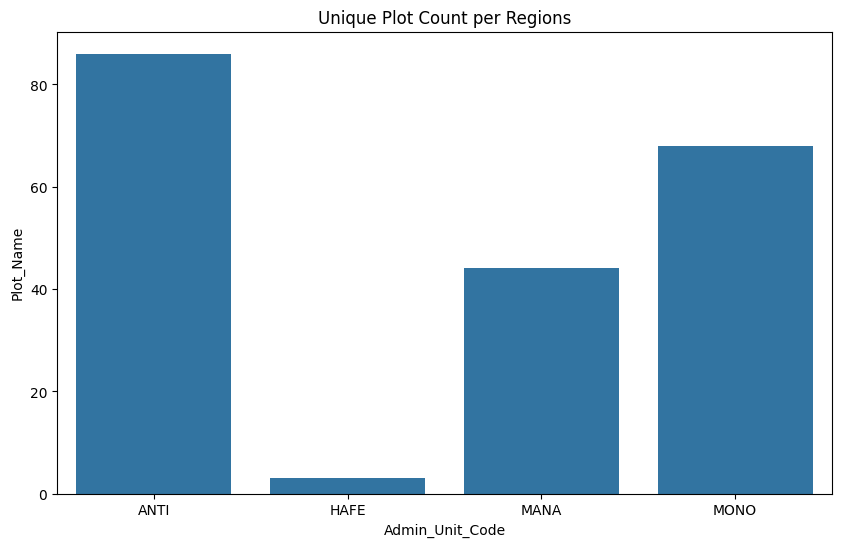

In [30]:
unique_sites = combined_grassland_df.groupby("Admin_Unit_Code")["Plot_Name"].nunique().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=unique_sites, x="Admin_Unit_Code", y="Plot_Name")                   
plt.title("Unique Plot Count per Regions")
plt.show()

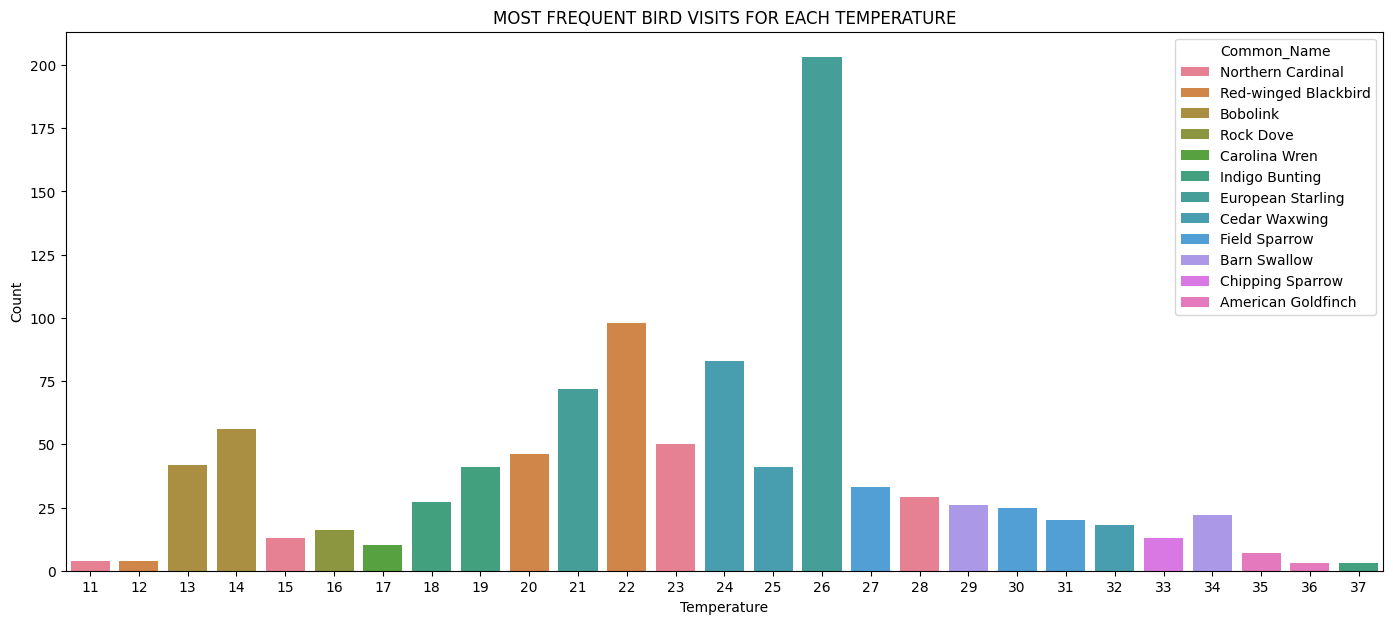

In [31]:
bird_counts = combined_grassland_df.groupby(["Temperature", "Common_Name"]).size().reset_index(name="Count")
most_visited_bird = bird_counts.loc[bird_counts.groupby("Temperature")["Count"].idxmax()]
plt.figure(figsize=(17,7))
sns.barplot(data=most_visited_bird, x="Temperature", y="Count", hue="Common_Name")
plt.title("MOST FREQUENT BIRD VISITS FOR EACH TEMPERATURE")
plt.show()

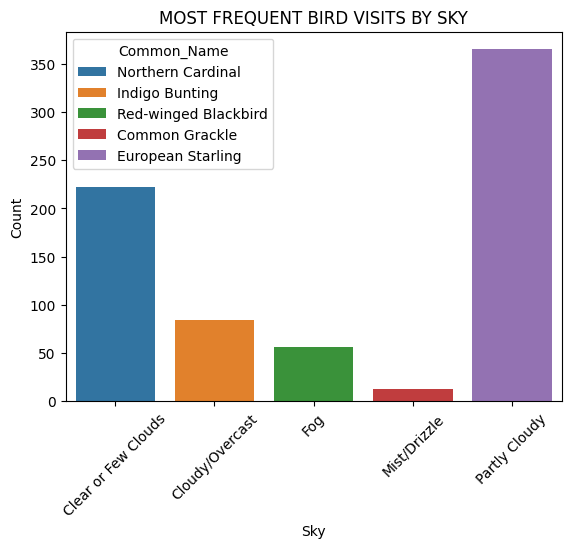

In [32]:
#DISPLAY THE MOSTED VISITED BIRD BY SKY 
bird_count_by_sky = combined_grassland_df.groupby(["Sky", "Common_Name"]).size().reset_index(name="Count")
bird_count_by_sky_max = bird_count_by_sky.loc[bird_count_by_sky.groupby("Sky")["Count"].idxmax()]
sns.barplot(data=bird_count_by_sky_max , x="Sky", y="Count", hue="Common_Name")
plt.title("MOST FREQUENT BIRD VISITS BY SKY")
plt.xticks(rotation=45)
plt.show()

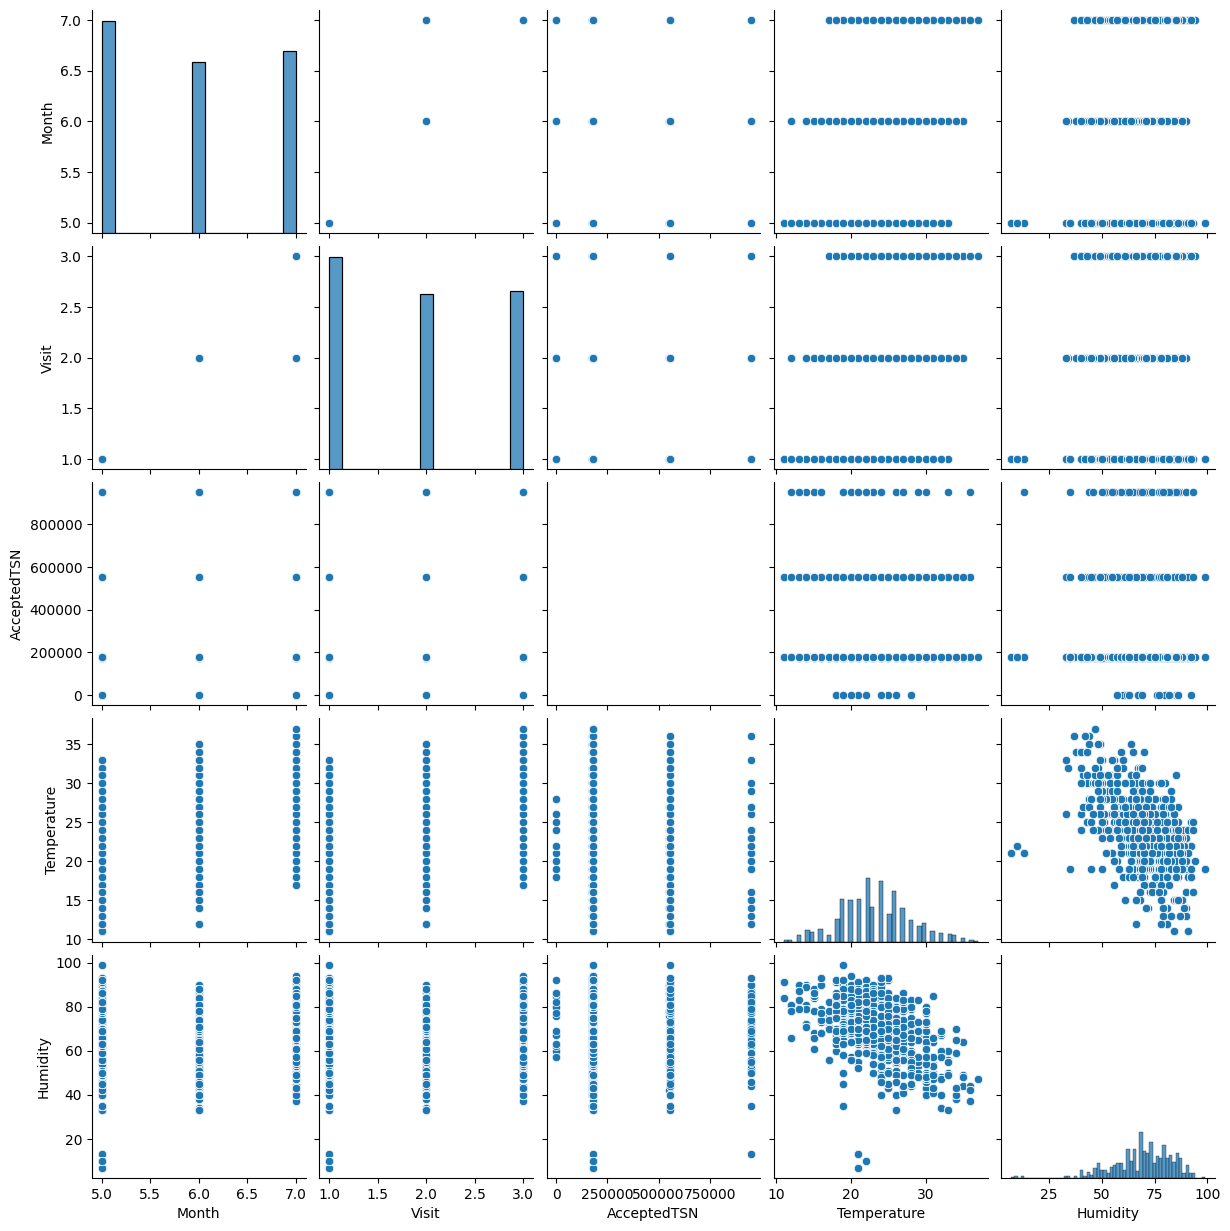

In [34]:
numeric_columns = ['Month', 'Visit', 'AcceptedTSN','Temperature','Humidity']
filtered_data = combined_grassland_df[numeric_columns]
sns.pairplot(filtered_data)
plt.show()